In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# 데이터 불러오기

(X_train, _), (X_test,_) = mnist.load_data()  # img만 가져오기
X_train= X_train.reshape(X_train.shape[0], 28,28,1).astype('float32') / 255
# 28*28 img (1: 흑백) >> 실수 변경 >> 정규화(255 나눔)
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32') / 255


11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# 생성자 모델
ae = Sequential()

In [5]:
# 인코딩
ae.add(Conv2D(16, kernel_size = 3, padding ='same', input_shape=(28,28,1), activation='relu'))
ae.add(MaxPooling2D(pool_size=2, padding='same'))
ae.add(Conv2D(8, kernel_size = 3, padding='same', activation='relu'))
ae.add(MaxPooling2D(pool_size=2, padding='same'))
ae.add(Conv2D(8, kernel_size = 3, strides= 2, padding='same', activation='relu'))

In [6]:
# 디코딩
ae.add(Conv2D(8, kernel_size = 3, padding='same', activation='relu'))
ae.add(UpSampling2D())
ae.add(Conv2D(8, kernel_size = 3, padding='same', activation='relu'))
ae.add(UpSampling2D())
ae.add(Conv2D(16, kernel_size = 3, activation='relu')) # padding ='same' 생략, 크기를 줄여야함
ae.add(UpSampling2D())
ae.add(Conv2D(1, kernel_size = 3, padding='same', activation='sigmoid')) # 출력층 활성화 함수 : sigmoid(이진분류)

In [7]:
# 전체 구조 확인
ae.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [11]:
# 환경설정 및 학습

# 환경설정(compile)
ae.compile(loss='binary_crossentropy', 
           optimizer = 'adam')

# 학습(fit)

ae.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 20s 18ms/step - loss: 0.2089 - val_loss: 0.1392
Epoch 2/50
469/469 [==============================] - 6s 14ms/step - loss: 0.1285 - val_loss: 0.1195
Epoch 3/50
469/469 [==============================] - 7s 15ms/step - loss: 0.1164 - val_loss: 0.1113
Epoch 4/50
469/469 [==============================] - 6s 14ms/step - loss: 0.1095 - val_loss: 0.1060
Epoch 5/50
469/469 [==============================] - 6s 14ms/step - loss: 0.1045 - val_loss: 0.1015
Epoch 6/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1012 - val_loss: 0.0987
Epoch 7/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0985 - val_loss: 0.0967
Epoch 8/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0965 - val_loss: 0.0944
Epoch 9/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0947 - val_loss: 0.0928
Epoch 10/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0932 - val_l

In [15]:
# 학습 결과 출력
random_test= np.random.randint(X_test.shape[0], size=5) # 테스트할 이미지 무작위 불러오기
ae_imgs = ae.predict(X_test) # test data로 예측 한 이미지

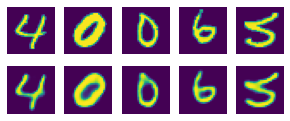

In [18]:
# 그래프로 확인

plt.figure(figsize = (7,2)) # 출력될 이미지 크기 정하기

for i, image_idx in enumerate(random_test):        # 무작위하게 추출한 이미지를 차례로 나열함
  ax = plt.subplot(2, 7, i+1)
  plt.imshow(X_test[image_idx].reshape(28,28))      # 테스트할 이미지를 먼저 그대로 보여줌
  ax.axis('off') 
  ax = plt.subplot(2,7,7+i+1)
  plt.imshow(ae_imgs[image_idx].reshape(28,28))     # 오토인코딩 결과를 다음 열에 출력함
  ax.axis('off')

plt.show()